Some to learn Dirichlet distribution

#### Reading based on **torch_geometric.data**

In [1]:
# ! pip uninstall torch torch-scatter torch-sparse torch-cluster torch-spline-conv torch_geometric 
# ! pip3 install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio===0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
! pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
! pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
! pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
! pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
! pip install torch_geometric 

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: https://pytorch-geometric.com/whl/torch-1.11.0+cu113.html


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached torch_geometric-2.0.4-py3-none-any.whl


In [2]:
import torch
from torch_geometric.data import Data
print(torch.__version__)

1.11.0+cu113


In [3]:
data = Data(
    x=torch.randn(5, 8, dtype=torch.float),
    edge_index=torch.tensor([[0, 1, 2, 2], [1, 2, 3, 4]], dtype=torch.float), 
    edge_attr=torch.randn(4, 3, dtype=torch.float), 
    y=[1, 0, 1, 0], 
    pos=None,
    is_edge_attr=True,
)

In [4]:
data.to_dict()

{'x': tensor([[ 2.4854, -1.8321,  0.3998,  0.5858,  0.4972,  2.2601, -1.0758,  0.5463],
         [-0.1436,  0.2834, -0.5831, -0.4188, -1.5793, -0.8771,  1.2000, -1.1072],
         [-1.0067,  1.6709,  0.9459,  0.1073,  1.2552,  0.9944,  0.5530,  0.5831],
         [-2.2163,  0.4255,  0.6223,  0.5430, -1.9518, -0.6384, -1.1506, -0.1012],
         [-0.5135, -2.8689, -1.0064,  0.2019,  1.3231,  0.0591,  0.4485, -0.2316]]),
 'edge_index': tensor([[0., 1., 2., 2.],
         [1., 2., 3., 4.]]),
 'edge_attr': tensor([[-1.1688,  0.8660,  0.0294],
         [ 0.0413,  0.6774, -1.8776],
         [-0.1538,  1.3029,  0.1149],
         [-0.5232,  1.8292,  0.0989]]),
 'y': [1, 0, 1, 0],
 'is_edge_attr': True}

In [5]:
data.apply(torch.exp, "pos").to_dict()

{'x': tensor([[ 2.4854, -1.8321,  0.3998,  0.5858,  0.4972,  2.2601, -1.0758,  0.5463],
         [-0.1436,  0.2834, -0.5831, -0.4188, -1.5793, -0.8771,  1.2000, -1.1072],
         [-1.0067,  1.6709,  0.9459,  0.1073,  1.2552,  0.9944,  0.5530,  0.5831],
         [-2.2163,  0.4255,  0.6223,  0.5430, -1.9518, -0.6384, -1.1506, -0.1012],
         [-0.5135, -2.8689, -1.0064,  0.2019,  1.3231,  0.0591,  0.4485, -0.2316]]),
 'edge_index': tensor([[0., 1., 2., 2.],
         [1., 2., 3., 4.]]),
 'edge_attr': tensor([[-1.1688,  0.8660,  0.0294],
         [ 0.0413,  0.6774, -1.8776],
         [-0.1538,  1.3029,  0.1149],
         [-0.5232,  1.8292,  0.0989]]),
 'y': [1, 0, 1, 0],
 'is_edge_attr': True}

In [6]:
data.has_isolated_nodes()

False

In [7]:
import networkx as nx
from torch_geometric.utils import to_networkx

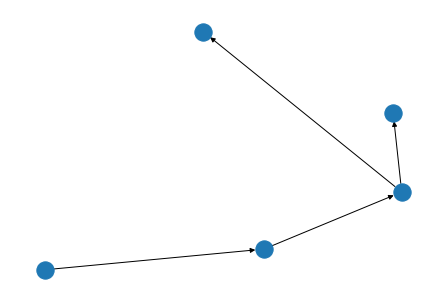

In [8]:
G = to_networkx(data, to_undirected=False)
nx.draw(G, pos=nx.spiral_layout(G))

- index_select: choose nodes
- `TemporalData`: the shape of src, dst, t and the first dimension of :obj.msg should be the same (num_events).
- raw_file_names and processed_file_names exist to ship the download or process

##### Further Reading based on **CREATING YOUR OWN DATASETS**
- @property raw_file_names: list of file names
- @property processed_file_names: return ['data.pt']
- download: download_url(url, self.raw_dir)
- process: pre_transform, pre_filter
- Application of ImbalancedSampler: sampler in other loaders

-
  - transform
  - pre_transform
  - subgraph
  - pin_memory, share_memory

#### Reading on **torch_geometric.loader**
- Dataloader: mini-batch
- Over-smoothing: GraphSAINT (node/edge/random walk), multi-dimensional random walk sampler
- ClusterData/ClusterLoader: useful to construct some motifs?

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import NeighborLoader

data = Planetoid(root="./HWK3/dataset", name='Cora')[0]

loader = NeighborLoader(
    data,
    # Sample 5 neighbors for each node for 2 iterations
    num_neighbors=[5] * 2,
    # Use a batch size of 128 for sampling training nodes
    batch_size=16,
    input_nodes=data.train_mask,
)

#### Reading on **torch_geometric.dataset**

- TUDataset, SNAPDataset, OGB_MAG
- semi-supervised: KarateClub, Planetoid
- knowledge graph: NELL
- unsupervised/inductive: CitationFull, Reddit, Flickr, Yelp, AmazonProducts
- self-supervised: RandomPartitionGraphDataset
- Pitfall in evaluation: Coauthor, Amazon
- Protein-Protein/Molecule: PPI, QM7b, QM9
- Deep Learning: MNISTSuperpixels, ModelNet


- split: to load different sets

#### Reading on **torch_geometric.transform**

- Compose
- ToSparseTensor: Convert the edge_index attributes of a homogeneous or heterogeneous data object into a (transposed) torch_sparse.SparseTensor type with key adj_.t.
- whether save the relative coordinate
- RemoveIsolatedNodes, AddSelfLoops, TwoHop
- OneHotDegree: add some topological information as the hot encoding to the node features
  - insights: augmented node features with topological features
- TargetIndegree: add destination node feature to the edge
  - Insights: related the node pair to the edge features
- RandomNodeSplit, RandomEdgeSplit, VirtualNode
- ToDense, GDC, SamplePoints, FixedPoints
- Not understood: FaceToEdge, LargestConnectedComponents